In [9]:
from sklearn.externals import joblib
(A,terms,snippets) = joblib.load( "articles-raw.pkl" )
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Loaded 2150 X 3139 document-term matrix


In [24]:
from sklearn.decomposition import LatentDirichletAllocation
k=15
model = LatentDirichletAllocation(n_components=k, max_iter=50, learning_method='online', learning_offset=50.,random_state=0).fit(A)
W = model.fit_transform( A )
H = model.components_

In [25]:
W.shape

(2150, 10)

In [26]:
H.shape

(10, 3139)

In [27]:
import numpy as np
def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

In [29]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 10 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: court, law, legal, rights, yukos, against, lord, government, bill, russian
Topic 02: company, deal, club, told, firm, chief, bid, executive, former, offer
Topic 03: film, best, music, show, awards, award, star, band, tv, album
Topic 04: game, england, against, time, win, back, play, team, players, half
Topic 05: olympic, drugs, athens, world, gold, sport, athletics, holmes, kelly, olympics
Topic 06: market, growth, economy, sales, 2004, china, economic, prices, world, rise
Topic 07: people, mobile, technology, users, music, digital, software, net, phone, computer
Topic 08: government, people, labour, election, party, blair, minister, brown, public, told
Topic 09: cards, bank, card, id, banks, credit, fraud, chip, cash, crime
Topic 10: games, game, women, world, title, dvd, european, titles, record, number


In [30]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

In [31]:
def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

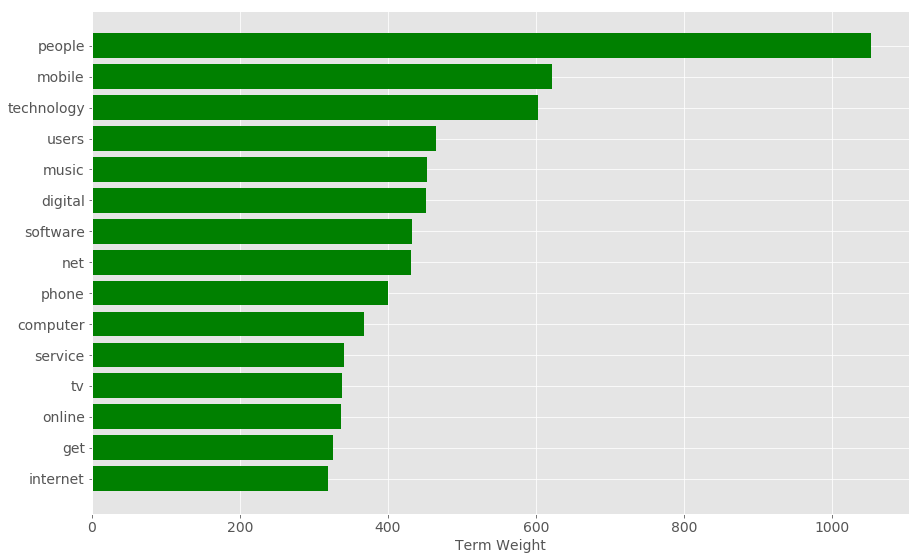

In [32]:
plot_top_term_weights( terms, H, 6, 15 )

In [33]:
def get_top_snippets( all_snippets, W, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( W[:,topic_index] )[::-1]
    # now get the snippets corresponding to the top-ranked indices
    top_snippets = []
    for doc_index in top_indices[0:top]:
        top_snippets.append( all_snippets[doc_index] )
    return top_snippets

In [34]:
topic_snippets = get_top_snippets( snippets, W, 0, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. US to rule on Yukos refuge call Yukos has said a US bankruptcy court will decide whether to block Ru
02. Yukos loses US bankruptcy battle A judge has dismissed an attempt by Russian oil giant Yukos to gain
03. Yukos sues four firms for $20bn Russian oil firm Yukos has sued four companies for their role in las
04. Yukos bankruptcy 'not US matter' Russian authorities do not have to abide by any US court decisions 
05. Yukos heading back to US courts Russian oil and gas company Yukos is due in a US court on Thursday a
06. Yukos unit buyer faces loan claim The owners of embattled Russian oil giant Yukos are to ask the buy
07. Yukos drops banks from court bid Russian oil company Yukos has dropped the threat of legal action ag
08. Deutsche attacks Yukos case German investment bank Deutsche Bank has challenged the right of Yukos t
09. Yukos accused of lying to court Russian oil firm Yukos lied to a US court in an attempt to stop the 
10. Yukos seeks court action on sale Yukos will return 

In [35]:
topic_snippets = get_top_snippets( snippets, W, 1, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. Ebbers denies WorldCom fraud Former WorldCom chief Bernie Ebbers has denied claims that he knew acco
02. Worldcom director ends evidence The former chief financial officer at US telecoms firm WorldCom has 
03. Worldcom ex-boss launches defence Lawyers defending former WorldCom chief Bernie Ebbers against a ba
04. Mixed reaction to Man Utd offer Shares in Manchester United were up over 5% by noon on Monday follow
05. Worldcom boss 'left books alone' Former Worldcom boss Bernie Ebbers, who is accused of overseeing an
06. Glazer makes new Man Utd approach Malcolm Glazer has made a fresh approach to buy Manchester United,
07. Shares rise on new Man Utd offer Shares in Manchester United closed up 4.75% on Monday following a n
08. Insurance bosses plead guilty Another three US insurance executives have pleaded guilty to fraud cha
09. WorldCom director admits lying The former chief financial officer at US telecoms firm WorldCom has a
10. Ferdinand casts doubt over Glazer Rio Ferdinand has

In [36]:
joblib.dump((W,H,terms,snippets), "articles-model-lda-k%02d.pkl" % k) 

['articles-model-lda-k10.pkl']